<a href="https://colab.research.google.com/github/surbhi139/recruitment/blob/main/recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**APPLICATION OF MACHINE LEARNING IN RECRUITMENT**

IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

IMPORTING THE DATASET

In [ ]:
dataset=pd.read_excel("Placement_Data_Full_Class.xlsx")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [ ]:
dataset.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000


EXPLORATORY DATA ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

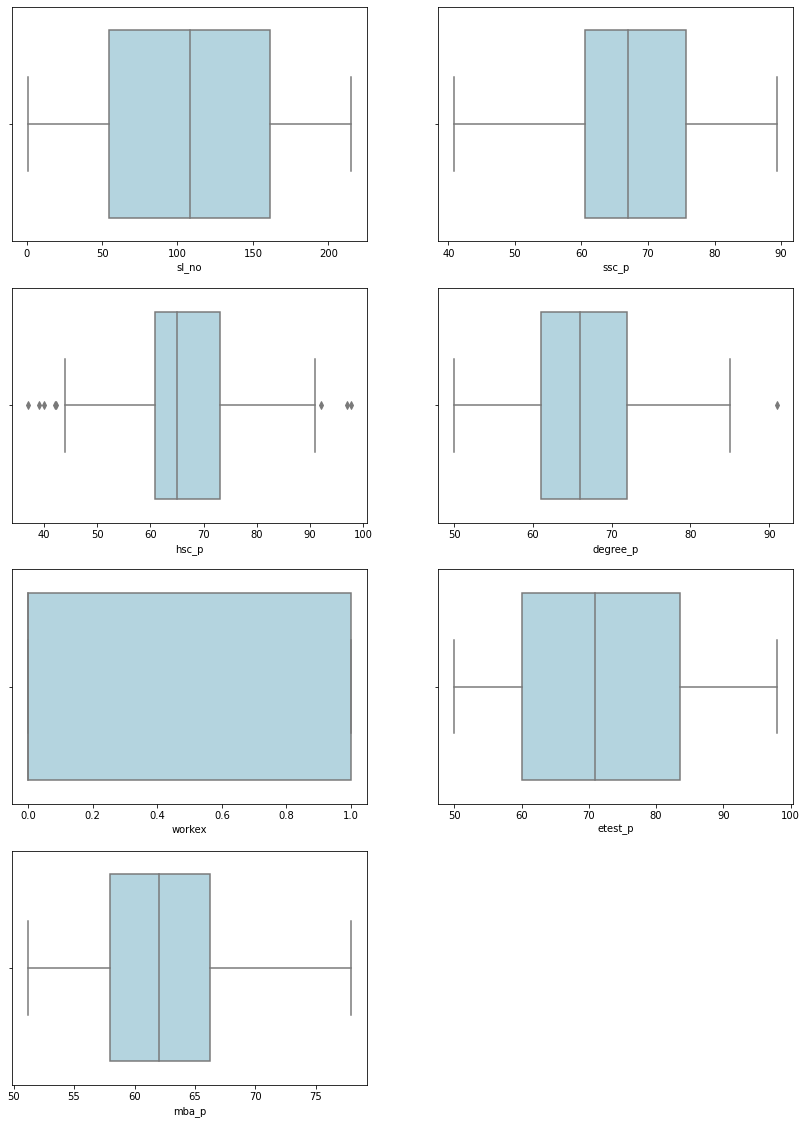

In [ ]:
plt.figure(figsize=(14,25))
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(5,2,j)
    sns.boxplot(dataset[i],color='lightblue')
plt.show()

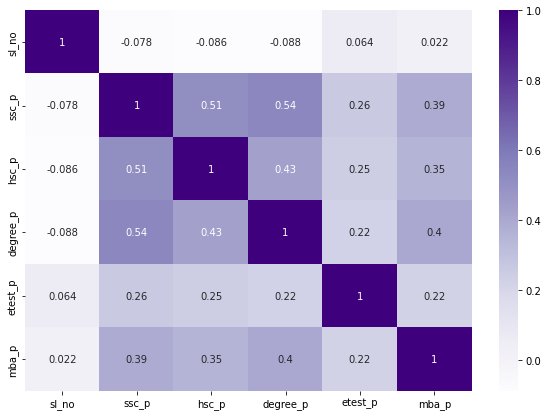

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(),annot=True, cmap="Purples")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Comm&Mgmt    0.674419
Sci&Tech     0.274419
Others       0.051163
Name: degree_t, dtype: float64

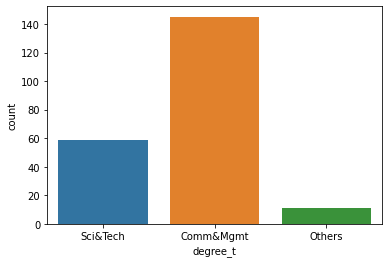

In [ ]:
sns.countplot(dataset['degree_t'])
dataset['degree_t'].value_counts(normalize=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


ENCODING THE CATEGORICAL VARIABLES

In [ ]:
from sklearn.preprocessing import LabelEncoder
labels=LabelEncoder()

dataset['gender']=labels.fit_transform(dataset['gender'])
dataset['ssc_b']=labels.fit_transform(dataset['ssc_b'])
dataset['hsc_b']=labels.fit_transform(dataset['hsc_b'])
dataset['hsc_s']=labels.fit_transform(dataset['hsc_s'])
dataset['degree_t']=labels.fit_transform(dataset['degree_t'])
dataset['workex']=labels.fit_transform(dataset['workex'])
dataset['specialisation']=labels.fit_transform(dataset['specialisation'])
dataset['status']=labels.fit_transform(dataset['status'])

In [ ]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


In [ ]:
X=dataset.drop(['status'], axis=1)
Y=dataset['status']

SPLITTING THE DATASET INTO THE TRAINING SET AND TESTING SET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=0)
print(X_train)

     sl_no  gender  ssc_p  ssc_b  ...  workex  etest_p  specialisation  mba_p
138    139       0  82.00      1  ...       1    96.00               0  71.77
52      53       0  40.89      1  ...       0    71.20               1  65.49
66      67       1  83.00      1  ...       0    68.92               1  58.46
26      27       1  71.00      1  ...       1    94.00               0  57.55
61      62       1  84.20      0  ...       0    61.60               0  62.48
..     ...     ...    ...    ...  ...     ...      ...             ...    ...
67      68       1  80.92      1  ...       0    68.71               0  60.99
192    193       1  65.20      0  ...       1    93.40               0  57.34
117    118       1  77.00      1  ...       0    80.00               0  67.05
47      48       1  63.00      0  ...       1    78.00               0  54.55
172    173       1  73.00      1  ...       0    84.00               1  52.64

[161 rows x 13 columns]


In [ ]:
print(y_train)

138    1
52     0
66     1
26     1
61     1
      ..
67     1
192    1
117    1
47     1
172    1
Name: status, Length: 161, dtype: int64


TRAINING THE MODEL IN THE TRANING SET

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression(solver='liblinear')
logreg

LogisticRegression(solver='liblinear')

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

PREDICTING THE MODEL IN THE TESTING SET

In [ ]:
pred_train=logreg.predict(X_train)
pred_train

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [ ]:
pred_test=logreg.predict(X_test)
pred_test

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

MAKING CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,roc_auc_score,precision_score,f1_score
print("Test confusion matrix :\n",confusion_matrix(pred_test, y_test))
print("Training Accuracy :",accuracy_score(pred_train, y_train)*100)
print("Test Accuracy :",accuracy_score(pred_test, y_test)*100)
print("Precision :",precision_score(pred_test, y_test)*100)
print("Recall :",accuracy_score(pred_test, y_test)*100)
print("F1-score",f1_score(pred_test, y_test)*100)

Test confusion matrix :
 [[10  3]
 [ 7 34]]
Training Accuracy : 90.6832298136646
Test Accuracy : 81.48148148148148
Precision : 91.8918918918919
Recall : 81.48148148148148
F1-score 87.17948717948718
